## Mapping of Gene Clusters to Biological Functions

In [1]:
# Import necessary modules
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
# Import gene cluster description data
gene_cluster_discription_df = pd.read_csv("data/JNJ2297.gene.cluster.discription.tsv", sep="\t")
print(gene_cluster_discription_df.shape)
print('This table maps the gene clusters [M.1, M.2, M.3, M.4] to biological functions.')
print('Each row is a biological function, and include the probability of the gene mapping.')
gene_cluster_discription_df.head()

(36, 11)
This table maps the gene clusters [M.1, M.2, M.3, M.4] to biological functions.
Each row is a biological function, and include the probability of the gene mapping.


,Cluster,module,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
1,M.1,M,R-HSA-8957275,Post-translational protein phosphorylation,2/3,108/10554,0.000309,0.009528,0.001962,2335/255738,2
2,M.1,M,R-HSA-381426,Regulation of Insulin-like Growth Factor (IGF)...,2/3,125/10554,0.000414,0.009528,0.001962,2335/255738,2
3,M.1,M,R-HSA-8866427,VLDLR internalisation and degradation,1/3,12/10554,0.003407,0.029671,0.006111,255738,1
4,M.1,M,R-HSA-354194,GRB2:SOS provides linkage to MAPK signaling fo...,1/3,15/10554,0.004258,0.029671,0.006111,2335,1
5,M.1,M,R-HSA-372708,p130Cas linkage to MAPK signaling for integrins,1/3,15/10554,0.004258,0.029671,0.006111,2335,1


In [3]:
gene_cluster_discription_df.columns

Index(['Cluster', 'module', 'ID', 'Description', 'GeneRatio', 'BgRatio',
       'pvalue', 'p.adjust', 'qvalue', 'geneID', 'Count'],
      dtype='object')

#### Prepare Data for Visualization

In [5]:
bio_functions_df = gene_cluster_discription_df[['Cluster', 'Description', 'GeneRatio', 'p.adjust', 'Count']]
print(bio_functions_df.shape)
bio_functions_df.head()

(36, 5)


,Cluster,Description,GeneRatio,p.adjust,Count
1,M.1,Post-translational protein phosphorylation,2/3,0.009528,2
2,M.1,Regulation of Insulin-like Growth Factor (IGF)...,2/3,0.009528,2
3,M.1,VLDLR internalisation and degradation,1/3,0.029671,1
4,M.1,GRB2:SOS provides linkage to MAPK signaling fo...,1/3,0.029671,1
5,M.1,p130Cas linkage to MAPK signaling for integrins,1/3,0.029671,1


#### Identify Unique Clusters in Dataset

In [6]:
np.unique(bio_functions_df['Cluster'])

array(['M.1', 'M.2', 'M.4'], dtype=object)

In [7]:
print(len(bio_functions_df.loc[bio_functions_df['Cluster'] == 'M.1']))
print(len(bio_functions_df.loc[bio_functions_df['Cluster'] == 'M.2']))
print(len(bio_functions_df.loc[bio_functions_df['Cluster'] == 'M.4']))

30
1
5


In [8]:
# Label clusters
cluster_names = []
for cluster in bio_functions_df['Cluster']:

    if cluster == 'M.1':
        cluster_names.append('M.1 (n=30)')
        
    elif cluster == 'M.2':
        cluster_names.append('M.2 (n=1)')
    
    elif cluster == 'M.4':
        cluster_names.append('M.4 (n=5)')

In [9]:
# Replace Cluster contents with cluster name list in bio_functions_df
bio_functions_df.loc[:,'Cluster'] = pd.Series(cluster_names, index=np.arange(1, 37))
bio_functions_df.tail()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Cluster,Description,GeneRatio,p.adjust,Count
32,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,5/9,7.152605e-08,5
33,M.4 (n=5),Interferon alpha/beta signaling,4/9,2.554329e-06,4
34,M.4 (n=5),Interferon Signaling,5/9,2.554329e-06,5
35,M.4 (n=5),Interferon gamma signaling,3/9,3.888315e-04,3
36,M.4 (n=5),ISG15 antiviral mechanism,2/9,9.348770e-03,2


#### Identify Unique Gene Ratios in Dataset and Convert to Numbers

In [10]:
np.unique(bio_functions_df['GeneRatio'])

array(['1/3', '2/3', '2/9', '3/9', '4/9', '5/13', '5/9'], dtype=object)

In [11]:
# Label markers
ratios = []
for ratio in bio_functions_df['GeneRatio']:

    if ratio == '2/9': # 0.22
        ratios.append(0.2)
        
    elif ratio == '1/3' or ratio == '3/9' : #0.33
        ratios.append(0.3)
        
    elif ratio == '5/13': #0.38
        ratios.append(0.4)
        
    elif ratio == '4/9': #0.44
        ratios.append(0.4)
        
    elif ratio == '5/9': #0.56
        ratios.append(0.6)
        
    elif ratio == '2/3': # 0.67
        ratios.append(0.7)

In [12]:
# Replace GeneRatio contents with ratios list in bio_functions_df
bio_functions_df.loc[:,'GeneRatio'] = pd.Series(ratios, index=np.arange(1, 37))
bio_functions_df.tail()

,Cluster,Description,GeneRatio,p.adjust,Count
32,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5
33,M.4 (n=5),Interferon alpha/beta signaling,0.4,2.554329e-06,4
34,M.4 (n=5),Interferon Signaling,0.6,2.554329e-06,5
35,M.4 (n=5),Interferon gamma signaling,0.3,3.888315e-04,3
36,M.4 (n=5),ISG15 antiviral mechanism,0.2,9.348770e-03,2


#### Create 6 p.adjust Cluster Centers with KMeans
p.adjust = the smallest significance level, when applied to an entire family of comparisons, at which a particular comparison will be deemed statistically significant

In [13]:
from sklearn.cluster import KMeans

In [14]:
values = list(bio_functions_df['p.adjust'])
print(len(values))
points = [(x,) for x in values]
len(points)

36


36

In [15]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(points)
ranges = kmeans.cluster_centers_.tolist()
flattened_ranges = [val for sublist in ranges for val in sublist]
print(ranges)
print('')
print(flattened_ranges)
kmeans.labels_, len(kmeans.labels_)

[[0.044967758711527556], [8.075629085271818e-05], [0.029739351059073358], [0.00946822612376019], [0.038121113357407435], [0.0339199346073575]]

[0.044967758711527556, 8.075629085271818e-05, 0.029739351059073358, 0.00946822612376019, 0.038121113357407435, 0.0339199346073575]


(array([3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5,
        5, 4, 4, 4, 4, 4, 0, 0, 1, 1, 1, 1, 1, 3], dtype=int32), 36)

In [16]:
# Create cluster map
cluster_map = pd.DataFrame()
cluster_map['data_values'] = values
cluster_map['cluster'] = kmeans.labels_  
print(cluster_map.shape)
cluster_map.head()

(36, 2)


,data_values,cluster
0,0.009528,3
1,0.009528,3
2,0.029671,2
3,0.029671,2
4,0.029671,2


In [17]:
print(len(cluster_map.loc[cluster_map['cluster'] == 0]), cluster_map.loc[cluster_map['cluster'] == 0].max())
print(len(cluster_map.loc[cluster_map['cluster'] == 1]), cluster_map.loc[cluster_map['cluster'] == 1].max())
print(len(cluster_map.loc[cluster_map['cluster'] == 2]), cluster_map.loc[cluster_map['cluster'] == 2].max())
print(len(cluster_map.loc[cluster_map['cluster'] == 3]), cluster_map.loc[cluster_map['cluster'] == 3].max())
print(len(cluster_map.loc[cluster_map['cluster'] == 4]), cluster_map.loc[cluster_map['cluster'] == 4].max())
print(len(cluster_map.loc[cluster_map['cluster'] == 5]), cluster_map.loc[cluster_map['cluster'] == 5].max())
print(flattened_ranges)

2 data_values    0.046597
cluster        0.000000
dtype: float64
5 data_values    0.000389
cluster        1.000000
dtype: float64
17 data_values    0.03084
cluster        2.00000
dtype: float64
3 data_values    0.009528
cluster        3.000000
dtype: float64
5 data_values    0.039379
cluster        4.000000
dtype: float64
4 data_values    0.03392
cluster        5.00000
dtype: float64
[0.044967758711527556, 8.075629085271818e-05, 0.029739351059073358, 0.00946822612376019, 0.038121113357407435, 0.0339199346073575]


In [18]:
# Define cluster center
cluster_centers = []
for cluster in cluster_map['cluster']:

    if cluster == 0: 
        cluster_centers.append(0.044968)
        
    elif cluster == 1: 
        cluster_centers.append(0.000081)
        
    elif cluster == 2: 
        cluster_centers.append(0.029739)
        
    elif cluster == 3: 
        cluster_centers.append(0.009468)
        
    elif cluster == 4: 
        cluster_centers.append(0.038121)
        
    elif cluster == 5: 
        cluster_centers.append(0.033920)

In [19]:
# Replace GeneRatio contents with ratios list in bio_functions_df
bio_functions_df.loc[:,'p.adjust KMeans Group Center'] = pd.Series(cluster_centers, index=np.arange(1, 37))
bio_functions_df.tail()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Cluster,Description,GeneRatio,p.adjust,Count,p.adjust KMeans Group Center
32,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5,0.000081
33,M.4 (n=5),Interferon alpha/beta signaling,0.4,2.554329e-06,4,0.000081
34,M.4 (n=5),Interferon Signaling,0.6,2.554329e-06,5,0.000081
35,M.4 (n=5),Interferon gamma signaling,0.3,3.888315e-04,3,0.000081
36,M.4 (n=5),ISG15 antiviral mechanism,0.2,9.348770e-03,2,0.009468


In [20]:
# Reorder dataset with lowest p.adjust values first 
bio_functions_df = bio_functions_df.sort_values(by='p.adjust')
bio_functions_df.head()

,Cluster,Description,GeneRatio,p.adjust,Count,p.adjust KMeans Group Center
32,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5,0.000081
34,M.4 (n=5),Interferon Signaling,0.6,2.554329e-06,5,0.000081
33,M.4 (n=5),Interferon alpha/beta signaling,0.4,2.554329e-06,4,0.000081
31,M.2 (n=1),Immunoregulatory interactions between a Lympho...,0.4,9.769765e-06,5,0.000081
35,M.4 (n=5),Interferon gamma signaling,0.3,3.888315e-04,3,0.000081


In [21]:
bio_functions_df.loc[bio_functions_df['Description'] == 'Antiviral mechanism by IFN-stimulated genes']

,Cluster,Description,GeneRatio,p.adjust,Count,p.adjust KMeans Group Center
32,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5,0.000081


In [22]:
for pathway in bio_functions_df['Description']:
    
    # define path row
    path_row = bio_functions_df.loc[bio_functions_df['Description'] == pathway]
    cluster = path_row['Cluster'].values
    
    if cluster == 'M.1 (n=30)':
        # Add M.2
        bio_functions_df = bio_functions_df.append({'Cluster': 'M.2 (n=1)','Description': pathway, 'GeneRatio': -0.1},ignore_index=True)
        
        # Add M.4
        bio_functions_df = bio_functions_df.append({'Cluster': 'M.4 (n=5)','Description': pathway, 'GeneRatio': -0.1},ignore_index=True)
    
    elif cluster == 'M.2 (n=1)':
        # Add M.1
        bio_functions_df = bio_functions_df.append({'Cluster': 'M.1 (n=30)','Description': pathway, 'GeneRatio': -0.1},ignore_index=True)
        
        # Add M.4
        bio_functions_df = bio_functions_df.append({'Cluster': 'M.4 (n=5)','Description': pathway, 'GeneRatio': -0.1},ignore_index=True)
        
    elif cluster == 'M.4 (n=5)':
        # Add M.1
        bio_functions_df = bio_functions_df.append({'Cluster': 'M.1 (n=30)','Description': pathway, 'GeneRatio': -0.1},ignore_index=True)
        
        # Add M.2
        bio_functions_df = bio_functions_df.append({'Cluster': 'M.2 (n=1)','Description': pathway, 'GeneRatio': -0.1},ignore_index=True)

In [23]:
bio_functions_df.shape

(108, 6)

In [24]:
bio_functions_df = bio_functions_df.sort_values(by='Description')
bio_functions_df.head()

,Cluster,Description,GeneRatio,p.adjust,Count,p.adjust KMeans Group Center
0,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5.0,0.000081
36,M.1 (n=30),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN
37,M.2 (n=1),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN
105,M.4 (n=5),COPI-dependent Golgi-to-ER retrograde traffic,-0.1,NaN,NaN,NaN
104,M.2 (n=1),COPI-dependent Golgi-to-ER retrograde traffic,-0.1,NaN,NaN,NaN


#### Add Color Based on Column Value

In [120]:
all_colors = ['crimson', 'orange', 'g', 'darkblue', 'purple', 'deeppink']
categories = np.unique(bio_functions_df['Cluster'])
colors = all_colors[0:len(categories)]
colors, len(categories)

(['crimson', 'orange', 'g'], 3)

In [121]:
def df_color(df, catcol):
    
    
    # Full colors list
    all_colors = ['crimson', 'orange', 'g', 'darkblue', 'purple', 'deeppink']
    
    # Create one color per unique category
    categories = np.unique(df[catcol])
    colors = all_colors[0:len(categories)]
    colordict = dict(zip(categories, colors))  
    
    # Add to df
    col_name = catcol + 'Color'
    df[col_name] = df[catcol].apply(lambda x: colordict[x])

    return df

In [122]:
bio_functions_df = df_color(bio_functions_df, 'Cluster')
print(bio_functions_df['ClusterColor'].unique())
bio_functions_df.head()

['g' 'crimson' 'orange']


,Cluster,Description,GeneRatio,p.adjust,Count,p.adjust KMeans Group Center,ClusterColor,GeneRatioColor
0,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5.0,0.000081,g,"(0.530026912725875, 0.7456362937331797, 0.8560..."
36,M.1 (n=30),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN,crimson,"(0.7561707035755478, 0.21038062283737025, 0.22..."
37,M.2 (n=1),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN,orange,"(0.7561707035755478, 0.21038062283737025, 0.22..."
105,M.4 (n=5),COPI-dependent Golgi-to-ER retrograde traffic,-0.1,NaN,NaN,NaN,g,"(0.7561707035755478, 0.21038062283737025, 0.22..."
104,M.2 (n=1),COPI-dependent Golgi-to-ER retrograde traffic,-0.1,NaN,NaN,NaN,orange,"(0.7561707035755478, 0.21038062283737025, 0.22..."


In [123]:
bio_functions_df = df_color(bio_functions_df, 'GeneRatio')
print(bio_functions_df['GeneRatioColor'].unique())
bio_functions_df.head()

['purple' 'crimson' 'g' 'orange' 'darkblue' 'deeppink']


,Cluster,Description,GeneRatio,p.adjust,Count,p.adjust KMeans Group Center,ClusterColor,GeneRatioColor
0,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5.0,0.000081,g,purple
36,M.1 (n=30),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN,crimson,crimson
37,M.2 (n=1),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN,orange,crimson
105,M.4 (n=5),COPI-dependent Golgi-to-ER retrograde traffic,-0.1,NaN,NaN,NaN,g,crimson
104,M.2 (n=1),COPI-dependent Golgi-to-ER retrograde traffic,-0.1,NaN,NaN,NaN,orange,crimson


In [165]:
bio_functions_df = bio_functions_df.sort_values(by=['Description', 'p.adjust'])
bio_functions_df.head()

,Cluster,Description,GeneRatio,p.adjust,Count,p.adjust KMeans Group Center,ClusterColor,GeneRatioColor
0,M.4 (n=5),Antiviral mechanism by IFN-stimulated genes,0.6,7.152605e-08,5.0,0.000081,g,purple
36,M.1 (n=30),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN,crimson,crimson
37,M.2 (n=1),Antiviral mechanism by IFN-stimulated genes,-0.1,NaN,NaN,NaN,orange,crimson
34,M.1 (n=30),COPI-dependent Golgi-to-ER retrograde traffic,0.3,4.333900e-02,1.0,0.044968,crimson,g
105,M.4 (n=5),COPI-dependent Golgi-to-ER retrograde traffic,-0.1,NaN,NaN,NaN,g,crimson


#### Visualize Data

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
bio_functions_df.columns

Index(['Cluster', 'Description', 'GeneRatio', 'p.adjust', 'Count',
       'p.adjust KMeans Group Center'],
      dtype='object')

### Barplots

In [166]:
plot_accurate_data_df = bio_functions_df[bio_functions_df['GeneRatio'] != -0.1]
plot_accurate_data_df.shape

(36, 8)

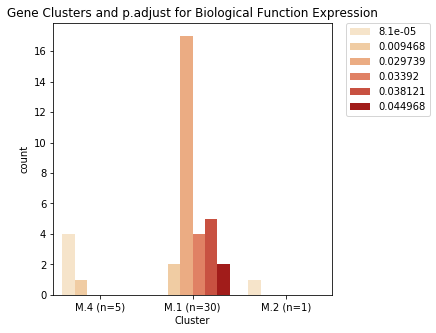

In [28]:
fig, ax = plt.subplots(figsize=(5,5))

g = sns.countplot(ax=ax, x='Cluster',
                hue='p.adjust KMeans Group Center',
                palette='OrRd',
                data=plot_accurate_data_df)

plt.title('Gene Clusters and p.adjust for Biological Function Expression')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

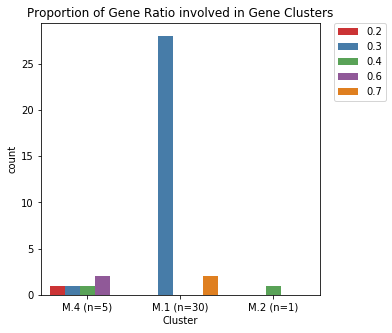

In [136]:
fig, ax = plt.subplots(figsize=(5,5))
g = sns.countplot(ax=ax, x='Cluster',
                hue='GeneRatio',
                palette='Set1',
                data=plot_accurate_data_df)

plt.title('Proportion of Gene Ratio involved in Gene Clusters')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Create a Barplot of all Genes by Cluster

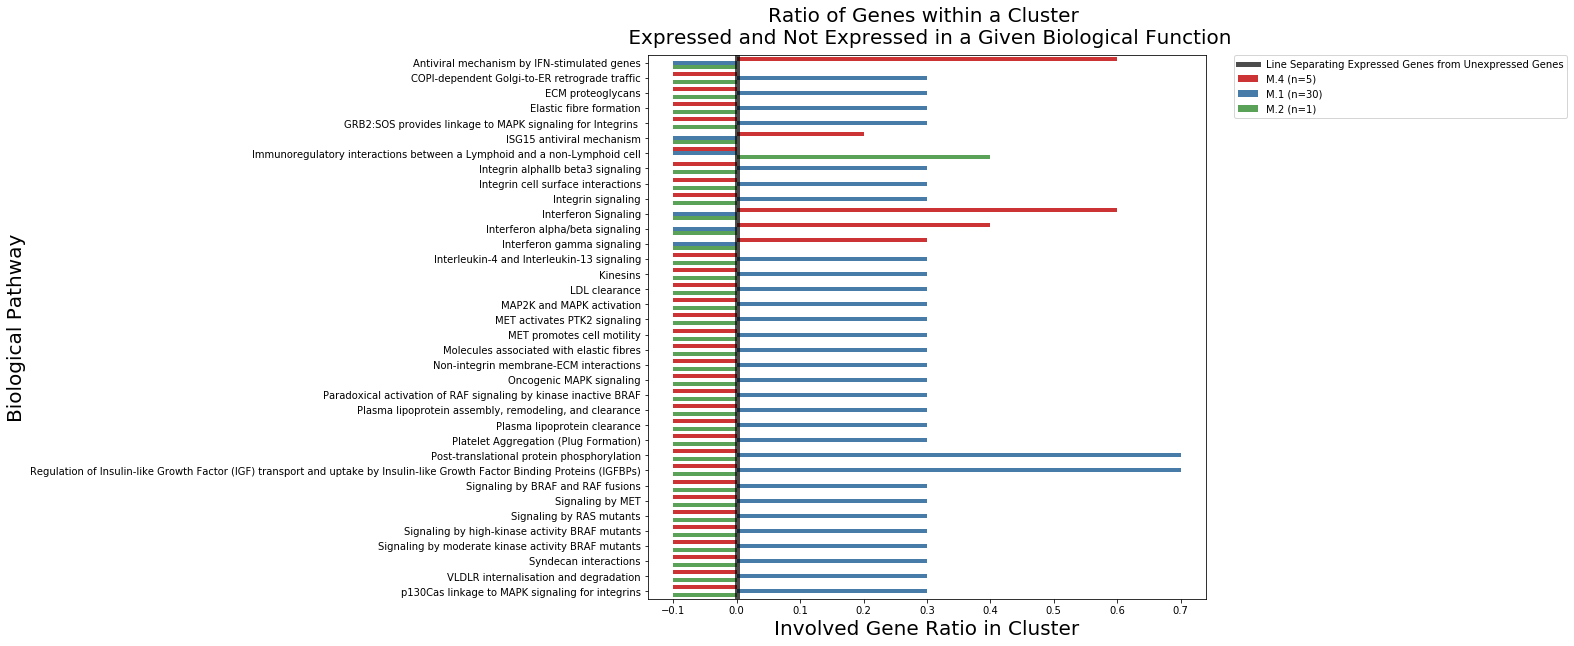

In [154]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='GeneRatio', y='Description', hue='Cluster', data=bio_functions_df, palette='Set1')
g.axes.axvline(x=0, color='black', linewidth=5, alpha=.7, label='Line Separating Expressed Genes from Unexpressed Genes')

# Label plot
plt.title('Ratio of Genes within a Cluster \n Expressed and Not Expressed in a Given Biological Function', size=20, y=1.01)
plt.xlabel('Involved Gene Ratio in Cluster', size=20)
plt.ylabel('Biological Pathway', size=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

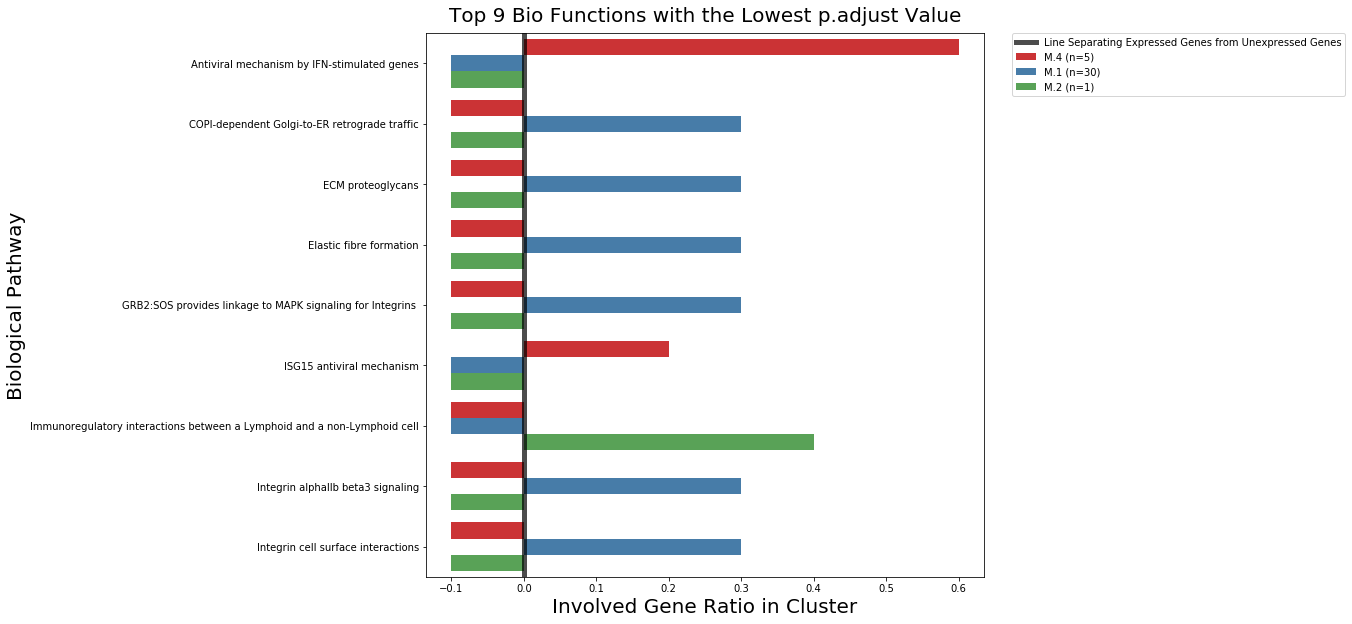

In [198]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='GeneRatio', y='Description', hue='Cluster', data=bio_functions_df[0:27], palette='Set1')
g.axes.axvline(x=0, color='black', linewidth=5, alpha=.7, label='Line Separating Expressed Genes from Unexpressed Genes')

# Label plot
plt.title('Top 9 Bio Functions with the Lowest p.adjust Value', size=20, y=1.01)
plt.xlabel('Involved Gene Ratio in Cluster', size=20)
plt.ylabel('Biological Pathway', size=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

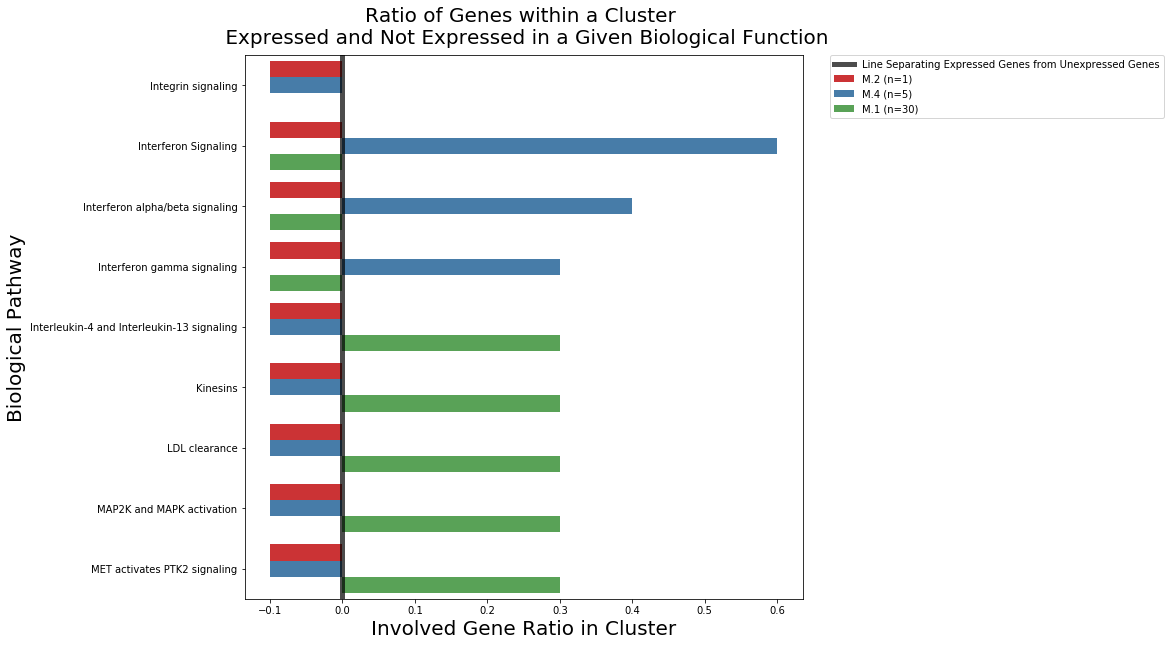

In [156]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='GeneRatio', y='Description', hue='Cluster', data=bio_functions_df[28:54], palette='Set1')
g.axes.axvline(x=0, color='black', linewidth=5, alpha=.7, label='Line Separating Expressed Genes from Unexpressed Genes')

# Label plot
plt.title('Ratio of Genes within a Cluster \n Expressed and Not Expressed in a Given Biological Function', size=20, y=1.01)
plt.xlabel('Involved Gene Ratio in Cluster', size=20)
plt.ylabel('Biological Pathway', size=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

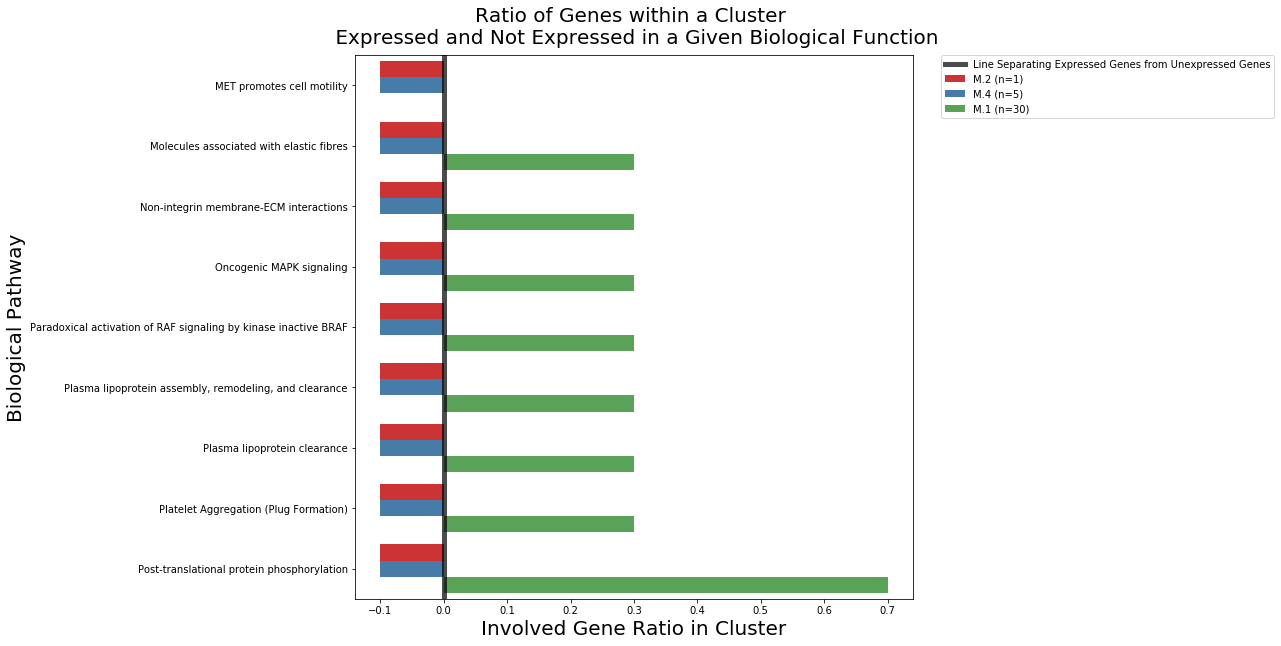

In [157]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='GeneRatio', y='Description', hue='Cluster', data=bio_functions_df[55:81], palette='Set1')
g.axes.axvline(x=0, color='black', linewidth=5, alpha=.7, label='Line Separating Expressed Genes from Unexpressed Genes')

# Label plot
plt.title('Ratio of Genes within a Cluster \n Expressed and Not Expressed in a Given Biological Function', size=20, y=1.01)
plt.xlabel('Involved Gene Ratio in Cluster', size=20)
plt.ylabel('Biological Pathway', size=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

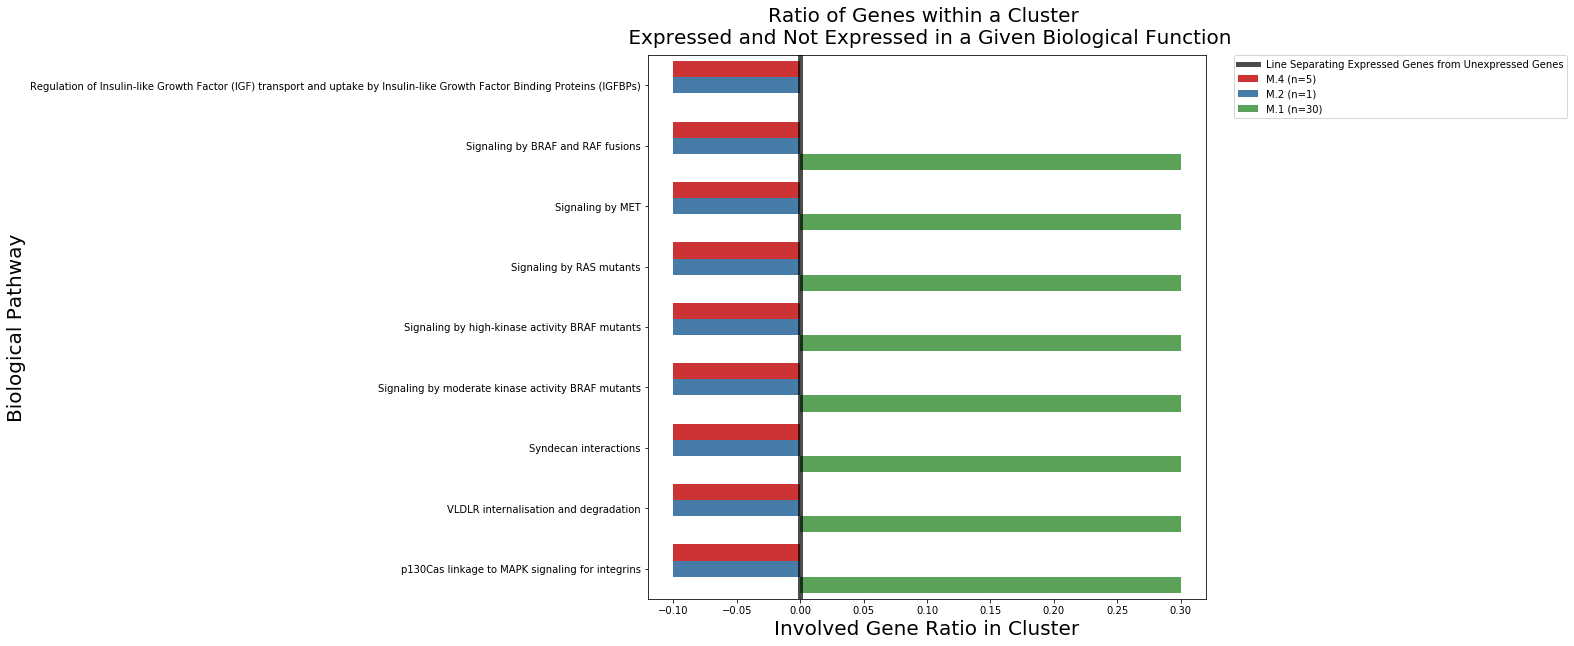

In [159]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='GeneRatio', y='Description', hue='Cluster', data=bio_functions_df[82:], palette='Set1')
g.axes.axvline(x=0, color='black', linewidth=5, alpha=.7, label='Line Separating Expressed Genes from Unexpressed Genes')

# Label plot
plt.title('Ratio of Genes within a Cluster \n Expressed and Not Expressed in a Given Biological Function', size=20, y=1.01)
plt.xlabel('Involved Gene Ratio in Cluster', size=20)
plt.ylabel('Biological Pathway', size=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

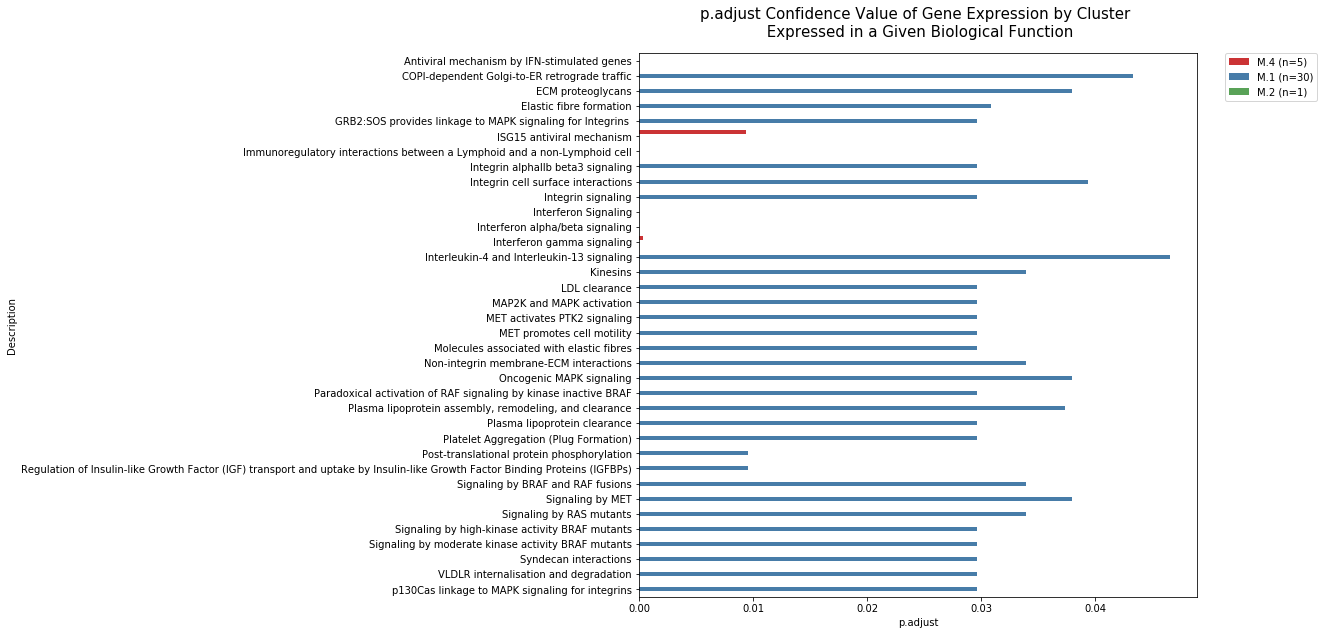

In [162]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='p.adjust', y='Description', hue='Cluster', data=plot_accurate_data_df, palette='Set1')
#g.axes.axvline(x=0, color='black', linewidth=5, alpha=.7, label='Line Separating Expressed Genes from Unexpressed Genes')

# Label plot
plt.title('p.adjust Confidence Value of Gene Expression by Cluster \n Expressed in a Given Biological Function', size=15, y=1.02)
plt.xlabel('p.adjust', size=10)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

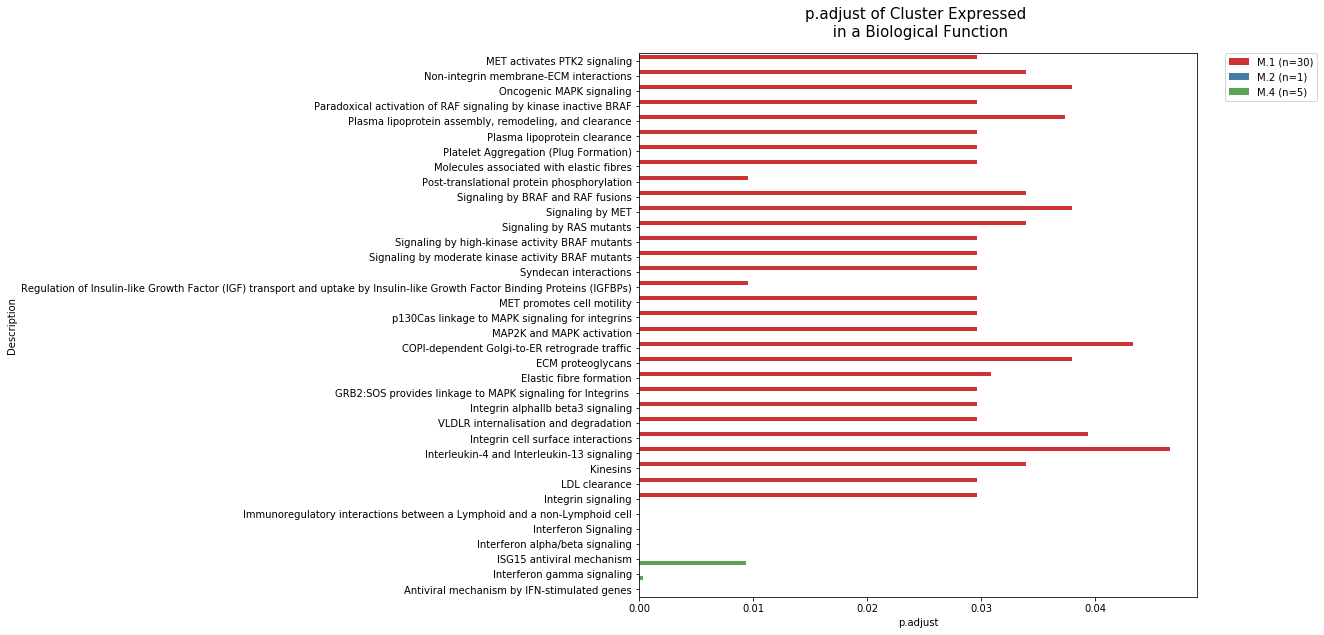

In [197]:
# Order data by cluster
cluster_order_df = plot_accurate_data_df.sort_values(by=['Cluster'])

fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='p.adjust', y='Description', hue='Cluster', data=cluster_order_df, palette='Set1')

# Label plot
plt.title('p.adjust of Cluster Expressed \n in a Biological Function', size=15, y=1.02)
plt.xlabel('p.adjust', size=10)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

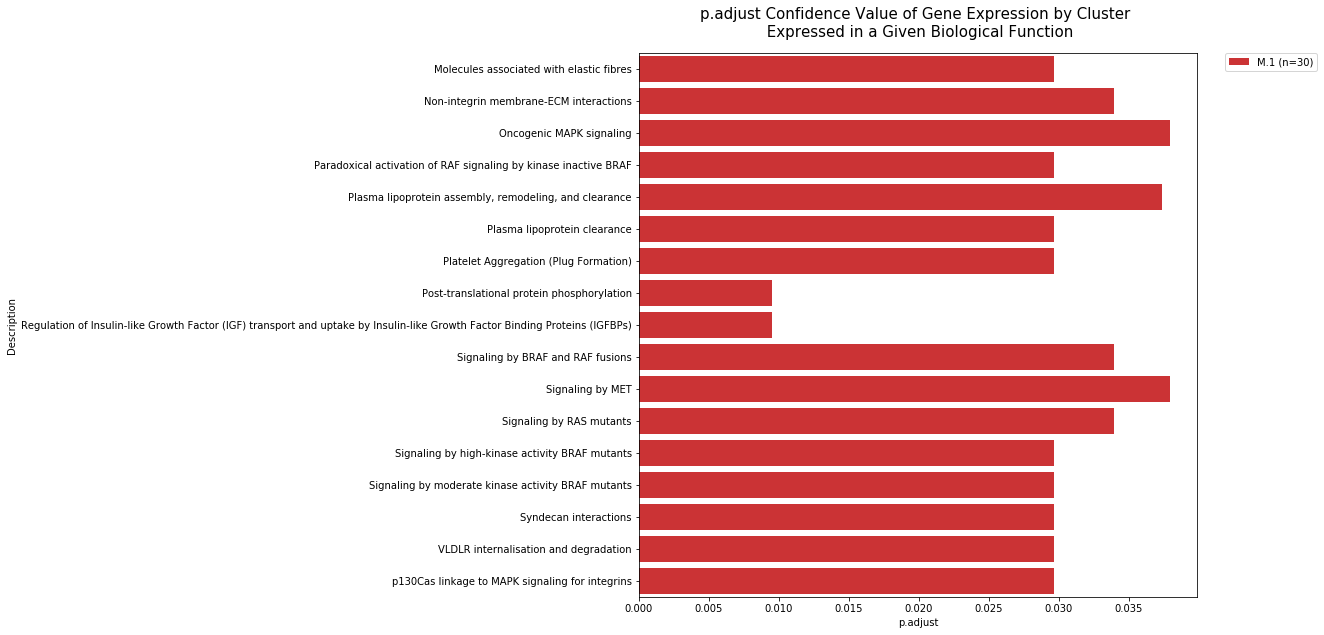

In [164]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(ax=ax, x='p.adjust', y='Description', hue='Cluster', data=plot_accurate_data_df[19:], palette='Set1')
#g.axes.axvline(x=0, color='black', linewidth=5, alpha=.7, label='Line Separating Expressed Genes from Unexpressed Genes')

# Label plot
plt.title('p.adjust Confidence Value of Gene Expression by Cluster \n Expressed in a Given Biological Function', size=15, y=1.02)
plt.xlabel('p.adjust', size=10)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Scatter Plots

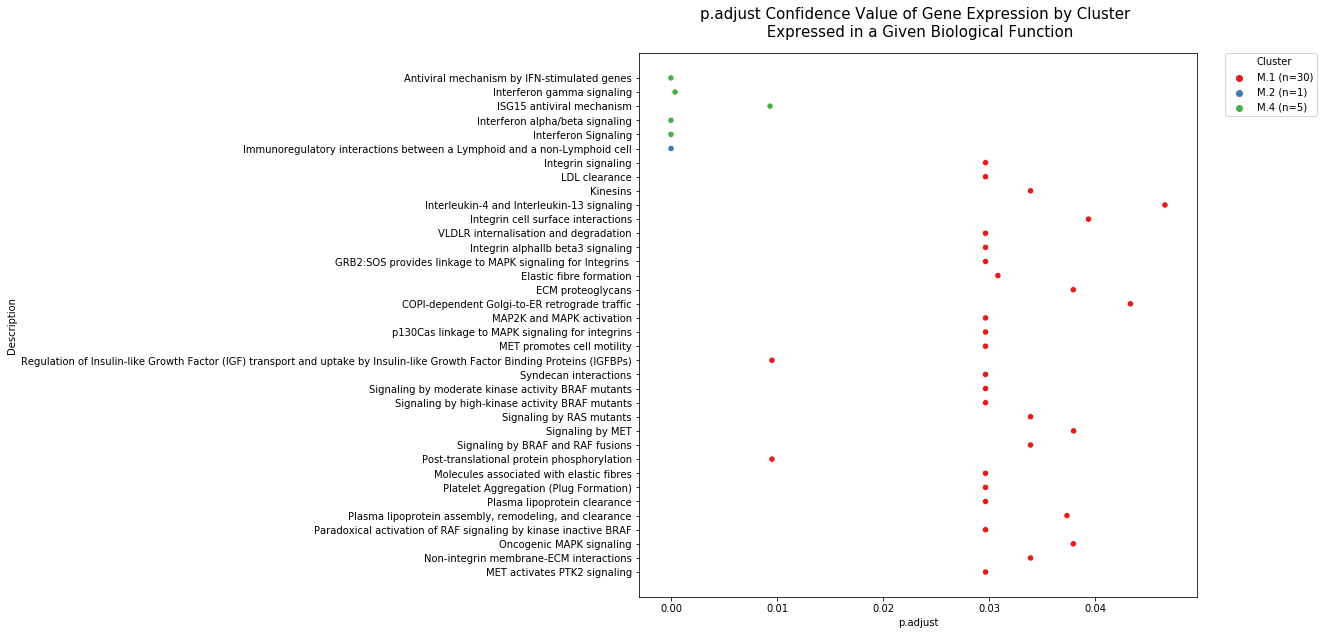

In [183]:
# Order data by cluster
cluster_order_df = plot_accurate_data_df.sort_values(by=['Cluster'])

fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(ax=ax, x='p.adjust', y='Description', hue='Cluster', data=cluster_order_df, palette='Set1', s=40)

# Label plot
plt.title('p.adjust Confidence Value of Gene Expression by Cluster \n Expressed in a Given Biological Function', size=15, y=1.02)
plt.xlabel('p.adjust', size=10)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

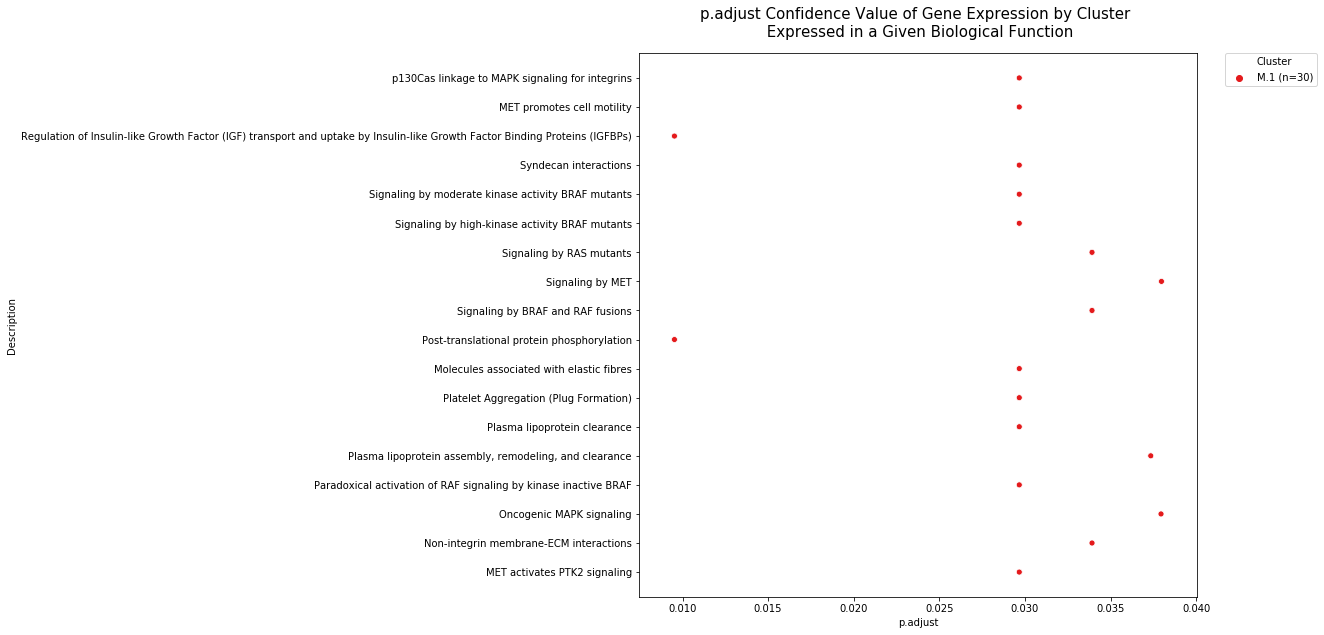

In [184]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(ax=ax, x='p.adjust', y='Description', hue='Cluster', data=cluster_order_df[0:18], palette='Set1')

# Label plot
plt.title('p.adjust Confidence Value of Gene Expression by Cluster \n Expressed in a Given Biological Function', size=15, y=1.02)
plt.xlabel('p.adjust', size=10)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

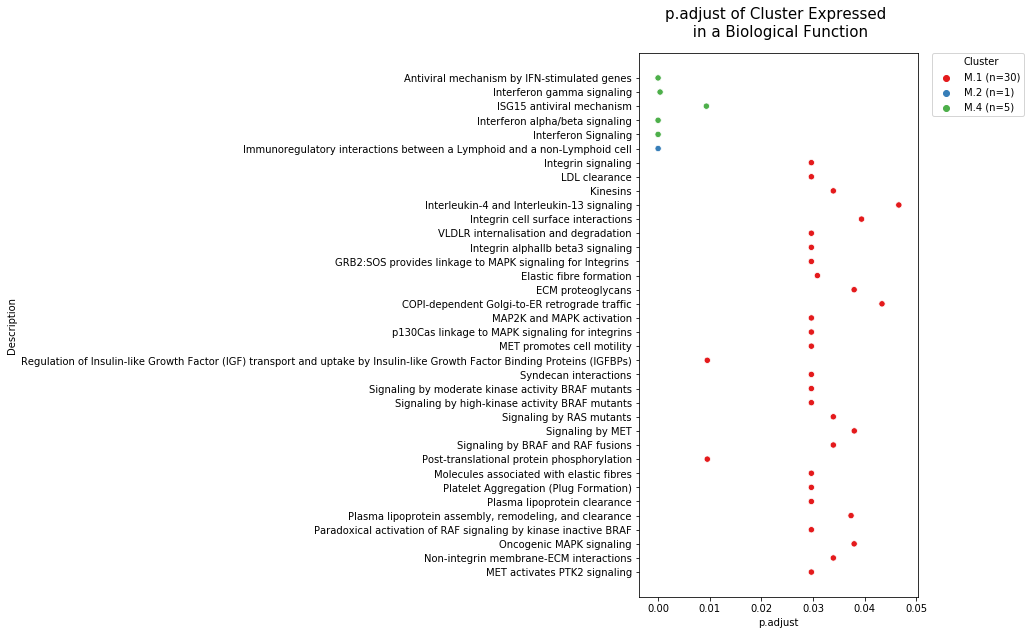

In [196]:
fig, ax = plt.subplots(figsize=(5,10))
g = sns.scatterplot(ax=ax, x='p.adjust', y='Description', hue='Cluster', data=cluster_order_df, palette='Set1', s=40)

# Label plot
plt.title('p.adjust of Cluster Expressed \n in a Biological Function', size=15, y=1.02)
plt.xlabel('p.adjust', size=10)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

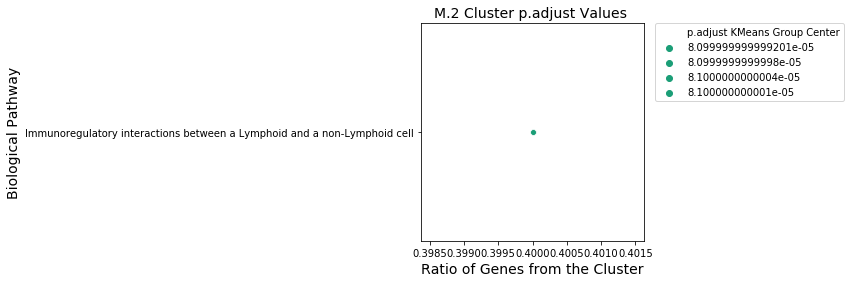

In [82]:
# Set figure size
fig, ax = plt.subplots(figsize=(4,4))
        
# Create barplot
g = sns.scatterplot(ax=ax, x='GeneRatio', y='Description',
        hue='p.adjust KMeans Group Center',
        palette='Dark2',
        data=cluster_dfs[1])
plt.title('M.2 Cluster p.adjust Values ', fontsize=14, y=1)
plt.xlabel('Ratio of Genes from the Cluster', size=14)
plt.ylabel('Biological Pathway', size=14)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

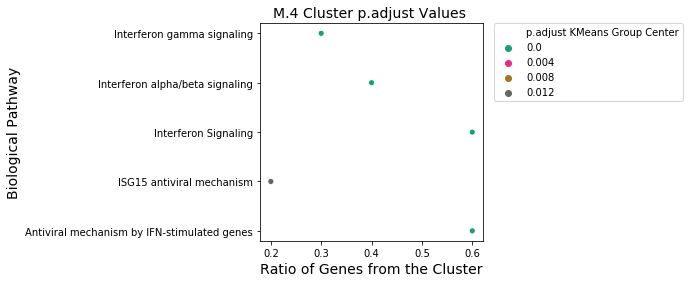

In [83]:
# Set figure size
fig, ax = plt.subplots(figsize=(4,4))
        
# Create barplot
g = sns.scatterplot(ax=ax, x='GeneRatio', y='Description',
        hue='p.adjust KMeans Group Center',
        palette='Dark2',
        data=cluster_dfs[2])
plt.title('M.4 Cluster p.adjust Values ', fontsize=14, y=1)
plt.xlabel('Ratio of Genes from the Cluster', size=14)
plt.ylabel('Biological Pathway', size=14)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [45]:
m1 = plot_accurate_data_df.loc[plot_accurate_data_df['Cluster'] == 'M.1 (n=30)']
m2 = plot_accurate_data_df.loc[plot_accurate_data_df['Cluster'] == 'M.2 (n=1)']
m4 = plot_accurate_data_df.loc[plot_accurate_data_df['Cluster'] == 'M.4 (n=5)']
cluster_dfs = [m1, m2, m4]

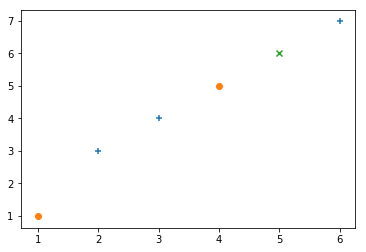

In [63]:
x = np.array([1,2,3,4,5,6])
y = np.array([1,3,4,5,6,7])
m = np.array(['o','+','+','o','x','+'])

unique_markers = set(m)  # or yo can use: np.unique(m)

for um in unique_markers:
    mask = m == um 
    # mask is now an array of booleans that van be used for indexing  
    plt.scatter(x[mask], y[mask], marker=um)